In [1]:
import torch
from unet import UNet
from dataset import COLOR_DICT
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = UNet()
model.load_state_dict(torch.load("unet_polygon.pth", map_location=torch.device('cpu')))
model.eval()

UNet(
  (enc1): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )


In [3]:
img_path = "dataset/validation/inputs/triangle.png"  # Example image
color_name = "green"

In [4]:
img = Image.open(img_path).convert("L")
transform = T.Compose([T.Resize((128, 128)), T.ToTensor()])
img_tensor = transform(img)

In [5]:
rgb = torch.tensor([v / 255.0 for v in COLOR_DICT[color_name]])
color_tensor = rgb.view(3, 1, 1).expand(-1, 128, 128)


In [6]:
input_tensor = torch.cat([img_tensor, color_tensor], dim=0).unsqueeze(0)

In [7]:
with torch.no_grad():
    output = model(input_tensor).squeeze(0).permute(1, 2, 0).numpy()

output = np.clip(output, 0, 1)

In [8]:
with torch.no_grad():
    output = model(input_tensor).squeeze(0)
    print("Output min:", output.min().item())
    print("Output max:", output.max().item())

output = output.permute(1, 2, 0).numpy()
output = np.clip(output, 0, 1)


Output min: 0.0033905243035405874
Output max: 0.995491087436676


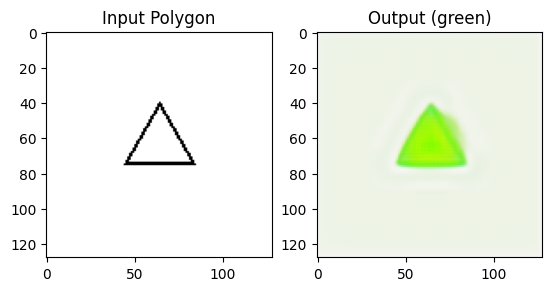

In [9]:
plt.subplot(1, 2, 1)
plt.title("Input Polygon")
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title(f"Output ({color_name})")
plt.imshow(output)
plt.show()